Import the only module needed atm

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = pd.read_csv('abalone.data')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### I had to manually type the feature names in :(

In [0]:
new_col = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'] 

In [18]:
data.columns = new_col

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [27]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [0]:
unique_rings = data['Rings'].unique()

In [23]:
unique_rings.sort()
unique_rings

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

#### From the website, the age of abalones are determined by the number of rings. However, it is much more time efficient to find the number of rings by predicting it with other attributes instead of counting them under a microscope. Therefore, we shall have to predict the rings of each abalone

In [28]:
x_features = data.iloc[:,:-1]
x_features.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [31]:
y = data.iloc[:,-1]
y.head()

0     7
1     9
2    10
3     7
4     8
Name: Rings, dtype: int64

## Need to normalise <font color='red'>gender</font> for x_features



In [38]:
x_features['Sex'].unique()

def find_num(a,b):
  count = 0
  for x in a:
    if x==b:
      count+=1
  print(count, b)

find_num(x_features['Sex'], 'M')
find_num(x_features['Sex'], 'F')
find_num(x_features['Sex'], 'I')

1527 M
1307 F
1342 I


In [0]:
x_features['Sex'].replace('I',0, inplace=True)
x_features['Sex'].replace('F',1, inplace=True)
x_features['Sex'].replace('M',2, inplace=True)

In [40]:
x_features['Sex']

0       2
1       1
2       2
3       0
4       0
       ..
4171    1
4172    2
4173    2
4174    1
4175    2
Name: Sex, Length: 4176, dtype: int64

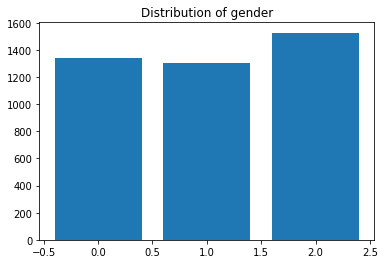

In [48]:
plt.bar(x_features['Sex'].unique(),[1527, 1307, 1342])
plt.title('Distribution of gender')
plt.show()

## Checking out <font color='green'>Diameter</font>

In [51]:
x_features['Diameter'].head()

0    0.265
1    0.420
2    0.365
3    0.255
4    0.300
Name: Diameter, dtype: float64

In [52]:
x_features['Diameter'].describe()

count    4176.000000
mean        0.407892
std         0.099250
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

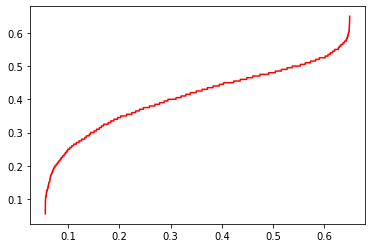

In [78]:
plt.plot(np.linspace(min(x_features['Diameter']),max(x_features["Diameter"]),4176),x_features['Diameter'].values, c='red')

#plt.plot(range(len(x_features[

#### Random Forest Classification :D

In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y)

In [83]:
classifier = rfc(n_estimators=10, max_depth=8, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)